<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name</b>: Ayush Kadakia<br>
<b>NetID</b>: aak227<br>
<b>Recitation (01/02/90/91)</b>: 91<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>: AK    


<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

# Lab 6: Linear Regression, Gradient Descent and Feature Engineering

### Due Date: Sunday Dec 12, 2021 on or before 11:59 PM

In this lab we will work through the process of:
1. implementing a linear model
2. defining loss functions using L1, L2 and Huber
3. Implementing a gradient descent 
4. Experiment with Feature Engineering
5. Examining regression using numeric libraries 


## Initialize

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")
%matplotlib inline

# Univariate Linear Regression
In this part of the lab, we will model linear regression based on a data set that contains grades from CS 205 course in fall 2018. The dataset (with no ID's) contain midterm and final exam grades (and other assignments). 
# Task 1 - Initialization
Read the file into a dataframe and keep only the midtermRaw and FinaRaw columns. We will be doing univariate regression on input=midterm, output=finalExam
The goal is to find a model that will allow us to predict the final exam score given the midterm score.

## Activity 1.1  Read Data

In [ ]:
import pandas as pd
df = pd.read_csv("data/CS205_grades_12_19_18_Final.csv")
df_cleaned = df[['midtermRaw','finalRaw']]
# drop all undefined rows 
df_cleaned = df_cleaned.dropna() 
df_cleaned.head()

## Activity 1.2 Normalize Data
Normalize midterm and final scores to be between 0 and 1.

In [ ]:
# set of observations
X = df_cleaned.dropna().iloc[:,[0]]
# set of categories
Y = df_cleaned.dropna().iloc[:,[1]]

# normalize the numeric data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
# BEGIN SOLUTION

X_scaled_values = scaler.fit_transform(X)
Y_scaled_values = scaler.fit_transform(Y)

# END SOLUTION

print(X_scaled_values, Y_scaled_values)

## Activity 1.3 Plot the data to see if a linear regression line is a good fit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# BEGIN SOLUTION

plt.scatter(X_scaled_values, Y_scaled_values)

# END SOLUTION

### Question 1.3.1
**Based on what you see in the plot, do you think it is fine to use linear regression?. Briefly explain below**

***BEGIN SOLUTION***

Yes, all the points fit around a line of best fit.

***END SOLUTION***

# Task 2 Manual Exploration of Linear Regression Line
In this task we will manually explore the linear regression line. This will give us a good intution about the process.
The goal now is to fit a line 
$$
h(\theta) = \theta_0 + \theta_1*x 
$$
for all data points (x,y), such that the error
$$
E(\theta) = \sum(h(\theta)-y)^2 $$ is minimized. In this task we will manually change the values of theta0 and theta1 such that you obtained the smallest possible error. 


In [ ]:
def h(theta0, theta1, x):
    """
    Return the model theta0 + theta1*x
    
    """
   
    return theta0+theta1*x

## Activity 2.1 - Define the square error (L2) function
Define the function, sqerror, that computes the error based on the two arguments provided. The function h($\theta$) is as defined above. Assume that x and y are the observed vectors. We use the square error in this case.

In [ ]:
import numpy as np

def sqerror(theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model 
    Returns: square error sum
    Assumptions: x, y vectors global
    """
    ## BEGIN SOLUTION
    
    L = lambda a: a ** 2
    y_pred = h(theta0, theta1, X_scaled_values)
    err_lst = Y_scaled_values - y_pred
    return float(sum(L(err_lst)))

    ## END SOLUTION

## testing
sqerror(0.29,0.52)

## Activity 2.2 - Define the L1 error function
Define the function, abserror, that computes the average absolute error based on the two arguments provided. The function h($\theta$) is as defined above. Assume that x and y are the observed vectors. We use the average abssolute error in this case.

In [ ]:
import numpy as np
import math

def abserror(theta0, theta1):
    """
    Input: parameters theta0 and theta1 of the model 
    Returns: square error sum
    Assumptions: x, y vectors global
    """
    ## BEGIN SOLUTION
    
    y_pred = h(theta0, theta1, X_scaled_values)
    err_lst = Y_scaled_values - y_pred
    return float(sum(abs(err_lst)))
    
    ## END SOLUTION

## testing
abserror(0.29,0.52)

## Activity 2.3 - Define the Pseudo Huber loss function
Define the function, phuberror, that computes the pseudo huber error based on the two arguments provided. The function h($\theta$) is as defined above. Assume that x and y are the observed vectors. We use the average huber error in this case. The equation for this function is given by 
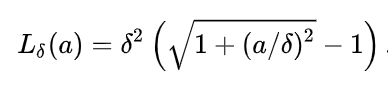

where a is the absolute difference between predicted and observed (that is, h($\theta$) - y) 

In [ ]:
import numpy as np
import math

def phuberror(theta0, theta1, delta):
    """
    Input: parameters theta0 and theta1 of the model 
    Returns: square error sum
    Assumptions: x, y vectors global
    """
    ## BEGIN SOLUTION

    return (delta**2 * (np.sqrt(1 + (abs(h(theta0, theta1, X_scaled_values) - Y_scaled_values)/delta)**2) - 1)).sum()

    ## END SOLUTION

## testing
phuberror(0.29,0.52,0.1)

## Activity 2.4 Interactive Exploration.
Let us initialize the interactive widget (used in Lab5) to create sliders that allows us to change the values of theta0 and theta1 and see how things change. Complete the function f below. The function is expected to get two values alpha(theta0) and beta(theta1) and plot both the points and the line on the same plot. It also needs to compute the error and display and error.

In [ ]:
from ipywidgets import interact
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
# interactive panel
import pylab
import numpy


def f(theta0, theta1):
    """
    Plot the line and points in an interactive panel
    """
    # BEGIN SOLUTION
    
    og_y = h(theta0, theta1, X_scaled_values)
    pylab.plot(X_scaled_values, og_y)
    
    s = sqerror(theta0, theta1)
    a = abserror(theta0, theta1)
    p = phuberror(theta0, theta1, .1)
    pylab.title('Sqr: ' + str(s) + '  Abs: ' + str(a) + '  Hub: ' + str(p))

    pylab.scatter(X_scaled_values, Y_scaled_values)
    pylab.show()
    
    # END SOLUTION

interact(f, theta1=(0,3,0.1), theta0=(-0,1,0.1));


## Activity 2.5 Record the best values for each error function
Write the "best" values you found for theta0 (y-intercept) and theta1 (slope) and the error. 
This error is the minimum you have observed based on the manual exploration using the widget 
above.

In [ ]:
# REPLACE THE DOTTED LINES WITH YOUR ANSWERS

# BEST VALUES FOR SQUARE ERROR
theta0 = .3
theta1 = .5
error = 2.894

# BEST VALUES FOR ABS ERROR
theta0 = .3
theta1 = .5
error = 15.5

# BEST VALUES FOR HUBER ERROR
theta0 = .3
theta1 = .5
error = .86

# Task 3 - Gradient Descent
In this task we use the Gradient descent methods to find a "better" values for theta0 and theta1 that minimizes the error. Gradient descent is an iterative algorithm. It computes values of theta0 and theta1 in the direction of reaching the minimum point in the graph. The iterative formulas are given by:
$$
\theta_0 = \theta_0 - \alpha*(\sum(\theta_1*x_j + \theta_0)-y_j)
$$
$$
\theta_1 = \theta_1 - \alpha*(\sum(\theta_1*x_j + \theta_0 - y_j)*x_j
$$

The alpha ($\alpha$) is called the "learning rate". It is important to pick a good value for alpha so that convergence is not too slow (small alpha) or at the risk of over shooting the minimum point (large alpha)

## Activity 3.1 Compute Gradient Descent (L2)

In [ ]:
# given the observed data (obsX,obsY), learning rate (alpha), and error threshold (how many decimals of accuracy) 
# the function returns theta0 and theta1
# that minimizes the error.

def gd2(obsX, obsY, alpha, threshold):
    """
    Return theta0, and theta1 from Gradient Descent algorithm
    """
    theta0, theta1 = 0, 0
    # BEGIN SOLUTION
    sum_theta0 = lambda a,b : float(sum(b*x+a-y for x,y in zip(obsX, obsY)))
    sum_theta1 = lambda a,b : float(sum((b*x+a-y)*x for x,y in zip(obsX, obsY)))
    prev_theta0, prev_theta1 = 0, 0
    oldError = sqerror(prev_theta0, prev_theta1)
    newError = oldError + 100
    iterations = 0

    while abs(newError - oldError) >= threshold:
        theta0 = prev_theta0 - alpha * sum_theta0(prev_theta0, prev_theta1)
        theta1 = prev_theta1 - alpha * sum_theta1(prev_theta0, prev_theta1)

        newError = sqerror(theta0, theta1)
        oldError = sqerror(prev_theta0, prev_theta1)

        prev_theta0 = theta0
        prev_theta1 = theta1

        iterations += 1
    # END SOLUTION        
    return theta0,theta1
    
#testing
print(gd2(X_scaled_values,Y_scaled_values,0.01,0.0001))

## Activity 3.2 Compute Gradient Descent (Huber)
First, compute a formula for the huber gradient descent using similar derivative methods used in gradient descent for L2 loss (we did derivatives for L2 loss in the lecture. You need to do the derivatives for humber function as defined above).

In [ ]:
# given the observed data (obsX,obsY), learning rate (alpha), error change threshold,
# and delta from the huber loss model,
# the function returns theta0 and theta1
# that minimizes the error.

delta = 1.0
def huberLoss(a):
    return a/((1 + (a/delta)**2)**(1/2))

def gdh(obsX, obsY, alpha, threshold, delta):
    """
    Return theta0 and theta1, error from huber gradient Descent algorithm
    """
    theta0, theta1 = 0, 0

    while(True):
      temp = obsY - (theta1 * obsX + theta0)
    
      prev_theta0 = alpha * sum(np.array(list(map(huberLoss, temp))))[0]
      prev_theta1 =  alpha * sum(np.array(list(map(huberLoss, temp * obsX))))[0]
    
      theta0 += prev_theta0
      theta1 += prev_theta1
    
      if abs(prev_theta0)<= threshold and abs(prev_theta1) <= threshold:
        break
    # END SOLUTION        
    return theta0,theta1

# testing
print(gdh(X_scaled_values,Y_scaled_values,0.001,0.0001,1.0))

## Activity 3.3


### 3.3.1. Write the values of theta0, theta1, alpha, error that provided the minimum value through gradient descent

In [ ]:
# REPLACE THE DOTTED LINES WITH YOUR ANSWERS

# L2 ERROR
theta0 = .3
theta1 = .5
alpha = 0
error = 2.894

# HUBER ERROR
theta0 = .3
theta1 = .5
alpha = 0
error = .861

### 3.3.2. Experiment with the new values of theta0, theta1 to see if the interactive widget shows similar things.

In [ ]:
interact(f, theta1=(0,3,0.1), theta0=(-0,1,0.1));

## Activity 3.4 Compare with Library Estimators (just for L2 error)
Now use the sklearn LinearRegression module to automate this process. What coefficients do you get? Are they close what you received from gradient descent? Find the error from sklearn package. Is that error smaller or bigger than the squared error you received? Write your answer below.

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
result = lm.fit(X_scaled_values,Y_scaled_values)
print(result.intercept_)
print(result.coef_)

In [ ]:
theta0 = result.intercept_
theta1 = result.coef_
sqerror(theta0,theta1)

### Write your answers to the Activity 3.4 questions here

***BEGIN SOLUTION***

I got .296 and .524 which is fairly close to the values I received from gradient descent. The error I got from the sklearn package is almost identical to the one I recieved. 

***END SOLUTION***

## Activity 3.5 - Predict Your Final Exam Score
The regression line was obtained using grades from CS 205 course. We can consider them to be training data. Now we trained a model (with theta0 and theta1) so we can predict the grade for your own course (CS 439) based on your midterm grade.
We will do few things before we can accomplish this task.

### 3.5.1 Read the midterm grades
The grade file for CS439 midterm is given in data/CS439_grades.csv. Read this data file to a new dataframe.

In [ ]:
import pandas as pd
df_439 = pd.read_csv("data/CS439_grades_03_15_19.csv")
df_439.info()
mid = df_439[df_439['midterm']<80]

### 3.5.2 Predict your Grade

In [ ]:
from sklearn import preprocessing

X = mid.iloc[:,[0]]
scaler = MinMaxScaler()
# BEGIN SOLUTION

X_scaled_values = scaler.fit_transform(X.values.reshape(-1, 1))

# END SOLUTION

n = len(X_scaled_values)
newX = X_scaled_values.reshape(n)
    
for i in range(len(X_scaled_values)):
    print('Midterm Score : ', round(100*newX[i],1), '\t', 'Predicted Score : ',100*h(theta0, theta1, newX[i])[0][0])

# Task 4 - Feature Engineering
In this task we will learn about feature engineering and how to use one-hot-encoding to analyze a data set.
To begin with, we load the tips dataset from the seaborn library. The tips data contains records of tips, total bill, and personal information about the person who paid the bill.

In [ ]:
data = sns.load_dataset("tips")
print("Number of Records:", len(data))
data.head()

## Activity 4.1: Defining the Model and Feature Engineering
Previously, we defined a simple linear model with only two parameters. Now let's make a more complicated model that utilizes other features in a dataset. Let our prediction for tip be a combination of the following features:

$$
\text{Tip} = \theta_1 * \text{total_bill} + \theta_2 * \text{sex} + \theta_3 * \text{smoker} + \theta_4 * \text{day} + \theta_5 * \text{time} + \theta_6 * \text{size}
$$

Notice that some of these features are not numbers! But our linear model will need to predict a numerical value. 


### 4.1.1 Split the data into tips (column tip) and X (all other columns)

In [ ]:
## BEGIN SOLUTION
tips = data["tip"]
X = data[["total_bill", "sex", "smoker", "day", "time", "size"]]
## END SOLUTION

## Activity 4.2: Feature Engineering
First, let's convert everything to numerical values. A straightforward approach is to map some of these non-numerical features into numerical ones. For example, we can treat the day as a value from 1-7. However, one of the issues in directly translating to a numeric value is that we unintentially assign certain features disproportionate weight. Consider assigning Sunday to the numeric value of 7. Monday is assigned to 1 and thus Sunday has 7 times the influence of Monday in our linear model which can lower the accuracy of our model. We will use **one-hot encoding** to address this issue (see lecture notes)

One-hot encoding will produce a binary vector indicating the non-numeric feature. Sunday would be encoded as a [0 0 0 0 0 0 1]. This assigns a more even weight across each category in non-numeric features. Complete the code below to one-hot encode our dataset.

In [ ]:
def one_hot_encode(data):
    """
    Return the one-hot encoded dataframe of our input, data. 
    Hint: check pd.get_dummies
    """
    ### BEGIN SOLUTION
    return pd.get_dummies(data)
    ### END SOLUTION

In [ ]:
one_hot_X = one_hot_encode(X)
one_hot_X.head()

## Activity 4.3: Defining the Model
Now that all of our data is numeric, let's define our model function. Note that X and thetas are matrices now. Use matrix products to compute the model.

In [ ]:
def linear_model(thetas, X):
    """
    Return the linear combination of thetas and features as defined above.
    """
    ### BEGIN SOLUTION
    return X.dot(thetas)
    ### END SOLUTION

In [ ]:
assert linear_model(np.arange(1,5), np.arange(1,5)) == 30

## Activity 4.4: Fitting the Model: Numerical Methods
Recall in the lectures and in labs, we defined multiple loss functions and found optimal theta using the scipy.minimize function. Adapt the loss functions and optimization code from the previous lab (provided below) to work with your new linear model.

In [ ]:
from scipy.optimize import minimize

def abserror(y, y_hat):
    return np.abs(y-y_hat)

def sqerror(y, y_hat):
    return (y - y_hat)**2

def minimize_average_loss(loss_function, model, x, y):
    """
    loss_function: either the squared or absolute loss functions from above.
    model: the model (as defined above)
    x: the x values (one-hot encoded data)
    y: the y values (tip amounts)
    return the estimate for each theta as a vector
    
    Note we will ignore failed convergence for this lab ... 
    """
    
    ## Notes on the following function call which you need to finish:
    # 
    # 0. the ... should be replaced with the average loss evaluated on 
    #       the data x, y using the model and appropriate loss function
    # 1. x0 are the initial values for THETA.  Yes, this is confusing
    #       but optimization people like x to be the thing they are 
    #       optimizing.
    # 2. We extract the 'x' entry in the dictionary which corresponds
    #       to the value of thetas at the optimum
    ### BEGIN SOLUTION
    return minimize(lambda theta: loss_function(model(theta, x), y).mean(), x0= np.zeros(12))['x']
    ### END SOLUTION

minimize_average_loss(sqerror, linear_model, one_hot_X, tips)

## Activity 4.5: Fitting the Model: Analytical Methods
Let's also fit our model analytically, for the L2 loss function. In this question we will derive an analytical solution, fit our model and compare our results with our numerical optimization results.

### 4.5.1: Least Squares Solution
Recall that if we're fitting a linear model with the l2 loss function, we are performing least squares! Remember, we are solving the following optimization problem for least squares:

$$\min_{\theta} ||X\theta - y||^2$$

Let's begin by deriving the analytic solution to least squares. Write your answer in LaTeX in the cell below. Assume X is full column rank.

***BEGIN SOLUTION***

$$ \theta=(X^TX)^{-1} X^Ty $$

***END SOLUTION***

### 4.5.2: Solving for Theta
Now that we have the analytic solution for $\theta$, let's find the optimal numerical thetas for our tips dataset. Fill out the function below. Make sure you use the float type in your calculations using .astype(float) and use the np.linalg.inv function.

In [ ]:
def get_analytical(x, y):
    """
    x: our one-hot encoded dataset
    y: tip amounts
    """
    ### BEGIN SOLUTION
    
    return np.linalg.inv(x.T.dot(x)).dot(x.T.dot(y))
    
    ### END SOLUTION

In [ ]:
analytical_thetas = get_analytical(one_hot_X.astype(float), tips.astype(float))
print("Our analytical loss is: ", sqerror(linear_model(analytical_thetas, one_hot_X),tips).mean())
print("Our numerical loss is: ", sqerror(linear_model(minimize_average_loss(sqerror, linear_model, one_hot_X, tips), one_hot_X), tips).mean())

## Activity 4.5.3 Compare Analytical and Numerical Loss
Our analytical loss is surprisingly much worse than our numerical loss. Why is this? Explain below.

Hint: https://stackoverflow.com/questions/31256252/why-does-numpy-linalg-solve-offer-more-precise-matrix-inversions-than-numpy-li

### BEGIN SOLUTION

The reason for this is because in our get_analytical function we are using numpy.linalg.inv() which does not give precise answers. It has to compute the inverse of a matrix by solving for A^-1 in A * A^-1 = I where I is the identity. However it takes more floating point operations to solve for A^-1. Also the matrix multiplication would involve more floating point operations which leads to even more slower performance and higher error. The better solution would have been to use np.linalg.solve.

### END SOLUTION

### Feedback
Please provide feedback on this lab.
* how would you rate this lab (from 1-10, 10-highest) : 9
* how can we improve his lab? : This was one of the more difficult labs, I think some clarification on questions would have made it easier.

<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as your_section_your_netID_lab6.jpynb<br>
<b> Submit To: </b> Canvas &rarr; Assignments &rarr; lab6 <br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

Lab Developed by A.D. Gunawardena @ 2019-2021